# Day 1 Challenge

You and your friend (let’s call him) Kenny, have decided to start an online website that aggregates movie and TV show data streamed by Netflix.

Kenny read an article that SAS University Edition would be the perfect free tool to analyse the data he has collected from Netflix before uploading it to the website’s database.

Before you upload the data, you’ll need to see what data you’re working with. You’ll import and clean the data by sorting, filtering and visualising some variables.


## Summary of Skills Demonstrated
- Importing data
- Filtering data
- Sorting data
- Generating a simple bar chart
---

### Importing Data
Create a new data set from the `NETFLIX_1940_2015` data set. 

In [36]:
# load modules
import numpy as np
import pandas as pd # for data analysis
import matplotlib.pyplot as plt # for creating graphs

# read dataset
netflix_1940_2015 = pd.read_csv('../datasets/NETFLIX_1940_2015.csv')

# Display information
netflix_1940_2015.info()

# Display first 5 rows of the dataset
netflix_1940_2015.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 7 columns):
title                317 non-null object
rating               317 non-null object
ratingLevel          315 non-null object
ratingDescription    317 non-null int64
release_year         317 non-null int64
user_rating_score    154 non-null float64
user_rating_size     317 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 17.4+ KB


,title,rating,ratingLevel,ratingDescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
3,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
4,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.0,80


Ensure that the new data set only contains records which **do not contain ‘NA’** as the `user_rating_score` and only contains movies **since the year 2000**. Save the output dataset in the NETFLIX library as `‘NETFLIX_1940_2015_FILTERED’`.

> **Question 1:** *How many titles were released since the year 2000 and do not have ‘NA’ as the user_rating_score value?*

In [30]:
# Filter dataset which do not contain missing values
netflix_1940_2015_filtered = netflix_1940_2015.dropna(subset=['user_rating_score'])

# Filter dataset which only contains movies since year 2000
netflix_1940_2015_filtered = netflix_1940_2015_filtered[netflix_1940_2015_filtered.release_year >= 2000]

# display number of titles since year 2000 that contains a user rating score
len(netflix_1940_2015_filtered)

123

Sort the `NETFLIX_1940_2015_FILTERED` data set in **descending order** by `user_rating_score`. 

Also drop the variables:
- `user_rating_size`
- `ratingDescription`
- `rating`
- `release_year`
- `ratingLevel` 

> **Question 2:** *What are the 3 most popular titles and the 3 least popular titles by user_rating_score?*

In [31]:
# Sort the dataset in descending order by user_rating_score
netflix_1940_2015_filtered.sort_values(by='user_rating_score', ascending=False, inplace=True)
netflix_1940_2015_filtered.reset_index(drop=True, inplace=True)

# Drop variables
subplot = netflix_1940_2015_filtered.drop(['user_rating_size', 'ratingDescription', 
                                 'rating', 'release_year', 'ratingLevel'], 
                                axis=1)

### 3 most popular titles by user rating score

In [32]:
subplot.head(3)

,title,user_rating_score
0,Lost,98.0
1,The Walking Dead,98.0
2,Prison Break,98.0


### 3 least popular titles by user rating score

In [33]:
subplot.tail(3)

,title,user_rating_score
120,DreamWorks Shrek's Swamp Stories,56.0
121,Curious George,55.0
122,Life Unexpected,55.0


Create a bar chart using the `NETFLIX_1940_2015_FILTERED` data set and select the appropriate category and measure to answer Question 3.

> **Question 3:** *Which year in the dataset has the most movie titles?*

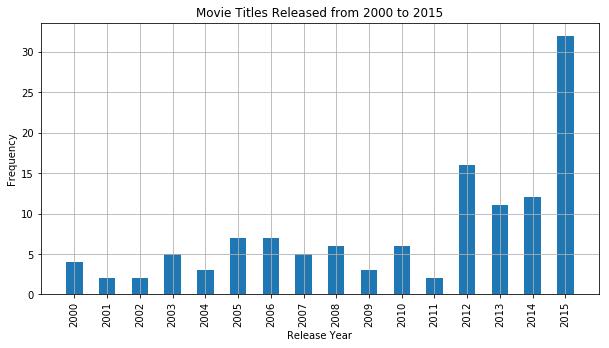

In [73]:
# count movie titles each year
release_year = netflix_1940_2015_filtered.release_year.unique()
release_year.sort()
count_movie_year = [netflix_1940_2015_filtered.release_year.tolist().count(year) for year in release_year]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Positions
bar_positions = np.arange(16)

# Height
bar_heights = ax.bar(bar_positions, count_movie_year, 0.5)

# Set x-axis tick positions
tick_positions = range(0, 16)
ax.set_xticks(tick_positions)
ax.set_xticklabels(release_year, rotation=90)

# Set axes labels
ax.set_xlabel("Release Year")
ax.set_ylabel("Frequency")
ax.set_title('Movie Titles Released from 2000 to 2015')

# Add gridlines and display plot
plt.grid()
plt.show()